In [1]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In this model, we are implementing , linear regression , xGboost regressor and ADA Regressor models

In [2]:
train_data=pd.read_csv('train_cleaned.csv')

In [3]:
train_data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395


In [4]:
len(train_data)

75757

In [5]:
test_data=pd.read_csv('test_cleaned.csv')

In [6]:
test_data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,7,0,0,13,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102
1,7,0,0,13,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102
2,7,0,0,13,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102
3,7,0,0,13,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,0,29,5,2,0,321.743363,310.19469,18.131327,150.755102
4,7,0,0,13,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,0,29,5,2,0,340.000000,330.00000,22.800000,126.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  int64  
 2   building_class             75757 non-null  int64  
 3   facility_type              75757 non-null  int64  
 4   floor_area                 75757 non-null  float64
 5   year_built                 75757 non-null  float64
 6   energy_star_rating         75757 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [8]:
len(test_data)

9705

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
X_train,X_test,y_train,y_test = train_test_split(train_data.drop('site_eui',axis=1), train_data[['site_eui']], test_size=0.25, 
                                                 random_state=10 )

In [26]:
xgregressor_model=XGBRegressor().fit(X_train, y_train)

In [27]:
y_pred = xgregressor_model.predict(X_train)

rmse_train = mean_squared_error( y_train, y_pred, squared=False)
print("Train RMSE = ", rmse_train )
r2_score_train = r2_score( y_train, y_pred )
print( "Train R2 Score: ", r2_score_train )

Train RMSE =  31.793528020332445
Train R2 Score:  0.6987133775521882


In [28]:
y_pred = xgregressor_model.predict(X_test)

rmse_train = mean_squared_error( y_test, y_pred, squared=False)
print("Test RMSE = ", rmse_train )
r2_score_train = r2_score( y_test, y_pred )
print( "Test R2 Score: ", r2_score_train )

Test RMSE =  42.277400199179105
Test R2 Score:  0.4906976600508418


In [29]:
type(y_test)

pandas.core.frame.DataFrame

In [30]:
y_pred

array([ 90.36182 ,  23.757767, 191.70851 , ...,  91.13394 ,  85.862785,
        77.48943 ], dtype=float32)

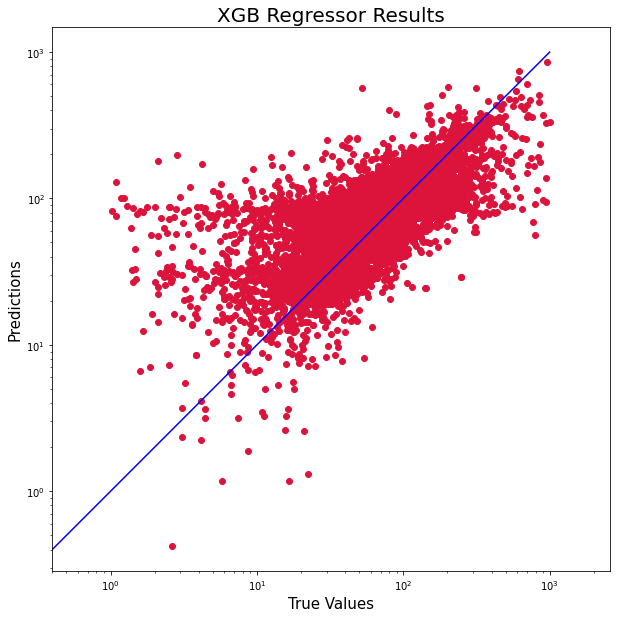

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(y_test.values, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test.values))
p2 = min(min(y_pred), min(y_test.values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("XGB Regressor Results",fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [33]:
plt.savefig('xgbregressor_results.png')

<Figure size 432x288 with 0 Axes>